# 합성곱 신경망
전역 픽셀을 학습하는 일반 신경망과 달리 합성곱 신경망은 지역 픽셀을 학습해 패턴을 찾아냄.  
합성곱 연산은 공간(높이 * 너비)과 깊이(채널)로 이루어진 특성맵 3텐서에 적용됨.  
컬러 채널은 차원이 3으로 RGB의 값을 가지지만, mnist같은 흑백 이미지는 채널의 차원이 1임.  
이런 입력특성이 들어오면 작은 패치들로 나누어서 학습을 진행해 모든 패치에 같은 변환을 적용해 출력 특성맵을 만들어냄.

패치의 크기 : 일반적으로 3x3 ,5x5의 크기를 사용하므로 예제에서 3x3 사용  
특성 맵의 출력 깊이 : 합성곱으로 계산할 필터의 개수. 예제에서 32,64,128로 사용  

## 합성곱 예시
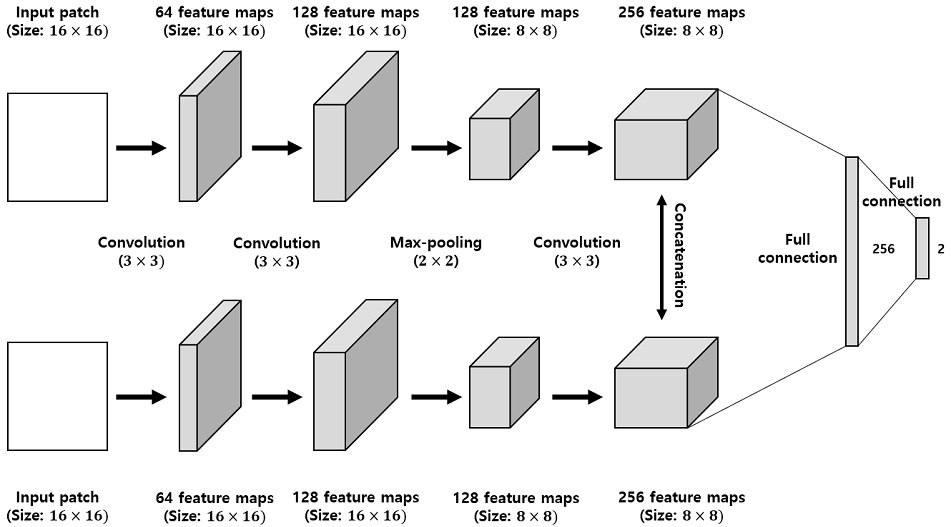

## 간단한 ConvNet 모델 생성

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

### 함수형 API로 모델 생성

In [3]:
inputs=keras.Input(shape=(28,28,1))

스트라이드 : 합성곱에서 커널 사이의 거리 (defalut=1)  
패딩 : 특성 맵의 가장 자리에 빈 행,열을 추가해 동일한 너비와 높이의 특성 맵을 출력하도록 하는 것
## 스트라이드 패딩 예시
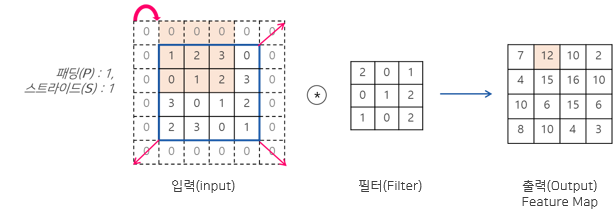

In [7]:
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(inputs)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.MaxPooling2D(pool_size=2)(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
outputs=layers.Dense(10,activation='softmax')(x)
model=keras.Model(inputs=inputs,outputs=outputs)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856 

In [9]:
from tensorflow.keras.datasets import mnist

In [16]:
(train_img,train_label),(test_img,test_label)=mnist.load_data()
train_img=train_img.reshape((60000,28,28,1))
train_img=train_img.astype('float32')/255.
test_img=test_img.reshape((10000,28,28,1))
test_img=test_img.astype('float32')/255.

In [17]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics='accuracy')
model.fit(train_img,train_label,epochs=5,batch_size=64)

Epoch 1/5
938/938 [==============================] - 42s 43ms/step - loss: 0.1025 - accuracy: 0.9725
Epoch 2/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0375 - accuracy: 0.9879
Epoch 3/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0271 - accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 41s 44ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 5/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0164 - accuracy: 0.9952


In [18]:
test_loss,test_accuracy=model.evaluate(test_img,test_label)

313/313 [==============================] - 3s 9ms/step - loss: 0.0234 - accuracy: 0.9928


In [19]:
print('테스트 정확도 : {0}, 손실 {1}'.format(test_accuracy,test_loss))

테스트 정확도 : 0.9927999973297119, 손실 0.02339235693216324


일반신경망의 성능
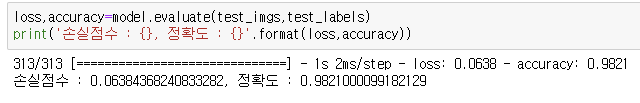
0.9821 -> 0.9928으로 정확도가 상승  
0.06 -> 0.02로 손실 감소  
**일반 신경망보다 기본적 합성곱 신경망의 성능이 더 좋음**

## Max_Pooling
위의 예제에서 특성맵의 크기는 26 * 26에서 max_pooling 연산에 의해 13 * 13으로 줄어 들었음.  
스트라이드 합성곱 처럼 특성맵을 다운샘플링하는 역할을 함.  
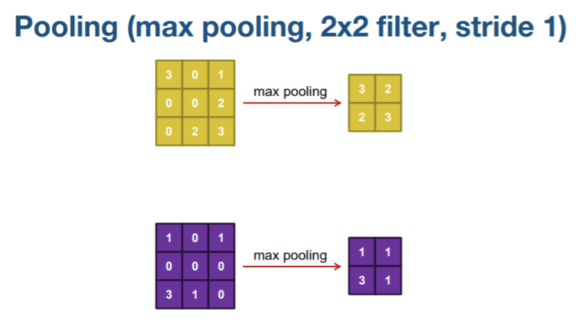

pooling연산이 없으면 모델의 크기가 커져 과대적합이 발생하거나, 특성맵에 대한 너무 적은 정보만 가지고 있게되어서 성능이 저하될 가능성이 있음.

In [22]:
inputs2=keras.Input(shape=(28,28,1))
x=layers.Conv2D(filters=32,kernel_size=3,activation='relu')(inputs2)
x=layers.Conv2D(filters=64,kernel_size=3,activation='relu')(x)
x=layers.Conv2D(filters=128,kernel_size=3,activation='relu')(x)
x=layers.Flatten()(x)
outputs2=layers.Dense(10,activation='softmax')(x)
model_no_pool=keras.Model(inputs=inputs2,outputs=outputs2)

In [23]:
model_no_pool.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 22, 22, 128)       73856     
                                                                 
 flatten_3 (Flatten)         (None, 61952)             0         
                                                                 
 dense_3 (Dense)             (None, 10)                619530    
                                                                 
Total params: 712,202
Trainable params: 712,202
Non-trainab

Max_pooling을 통한 다운샘플링을 하는 이유는 특성맵에 대한 가중치를 줄이기 위해서 하는 것임.  